# Analysis and Visualizations

## Importing Libraries and Data

In [66]:
#Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap

In [3]:
#Imported path
path = r'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [4]:
path

'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [5]:
#Imported Adidas US Sales Dataset.csv
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'df_adidas_US_clean.csv'), index_col = False)

## Data Cleaning

In [6]:
#Checked head
df.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice Year,Invoice Month
0,Foot Locker,1/1/20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store,2020,1
1,Foot Locker,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store,2020,1
2,Foot Locker,1/3/20,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1
3,Foot Locker,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1
4,Foot Locker,1/5/20,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store,2020,1


In [7]:
#Checked shape
df.shape

(9648, 14)

In [8]:
#Deleted unnecessary columns
df = df.drop(columns=['Invoice Date'])

In [9]:
df.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price per Unit',
       'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin',
       'Sales Method', 'Invoice Year', 'Invoice Month'],
      dtype='object')

In [10]:
#Rechecked shape
df.shape

(9648, 13)

In [11]:
#Checked for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool

In [12]:
#Checked for missing values 
df.isnull().sum()

Retailer            0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Invoice Year        0
Invoice Month       0
dtype: int64

## Analysis and Visualizations

In [13]:
#Checked head
df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice Year,Invoice Month
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store,2020,1
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store,2020,1
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store,2020,1


In [14]:
#Created dataframe product sales
product_sales=pd.DataFrame((df["Product"],df["Total Sales"]))
product_sales= product_sales.transpose()
product_sales= product_sales.groupby("Product").sum()
product_sales

,Total Sales
Product,
Men's Apparel,123728632
Men's Athletic Footwear,153673680
Men's Street Footwear,208826244
Women's Apparel,179038860
Women's Athletic Footwear,106631896
Women's Street Footwear,128002813


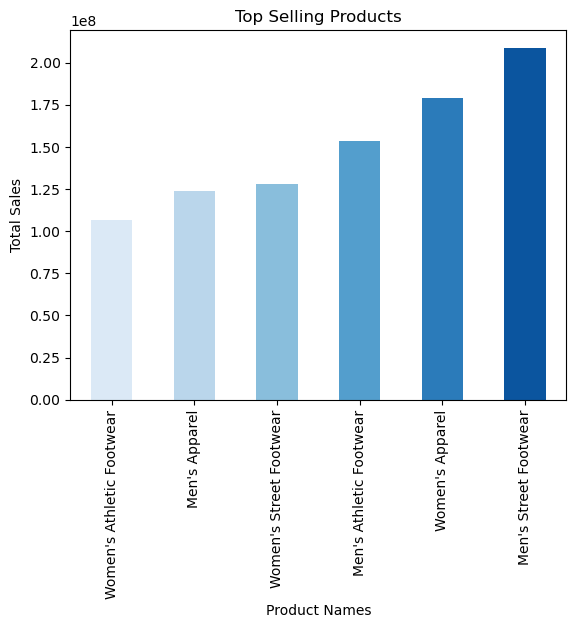

In [15]:
#Created top selling products bar chart
top_prods_bar = product_sales['Total Sales'].sort_values(ascending=True).plot.bar(grid=False, color=sns.color_palette('Blues'))
plt.xlabel('Product Names')
plt.ylabel('Total Sales')
plt.title('Top Selling Products')
plt.show()

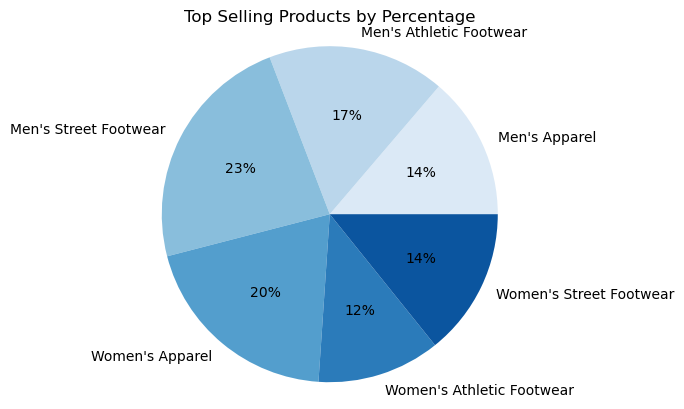

In [17]:
#Created pie chart
colors = sns.color_palette('Blues', 6) 
pie_chart, pie_labels, _ = plt.pie(product_sales['Total Sales'], labels=product_sales.index, colors=colors, autopct='%1.0f%%')
plt.title('Top Selling Products by Percentage')
plt.axis('equal')
plt.show()

In [18]:
pie_chart[0].figure.savefig(os.path.join(path, 'Visualizations', 'top_prods_by_perc.png'), bbox_inches='tight')

In [19]:
#Created dataframe top retailers
retailer_sales=pd.DataFrame((df["Retailer"],df["Total Sales"]))
retailer_sales= retailer_sales.transpose()
retailer_sales= retailer_sales.groupby("Retailer").sum()
retailer_sales

,Total Sales
Retailer,
Amazon,77698912
Foot Locker,220094720
Kohl's,102114753
Sports Direct,182470997
Walmart,74558410
West Gear,242964333


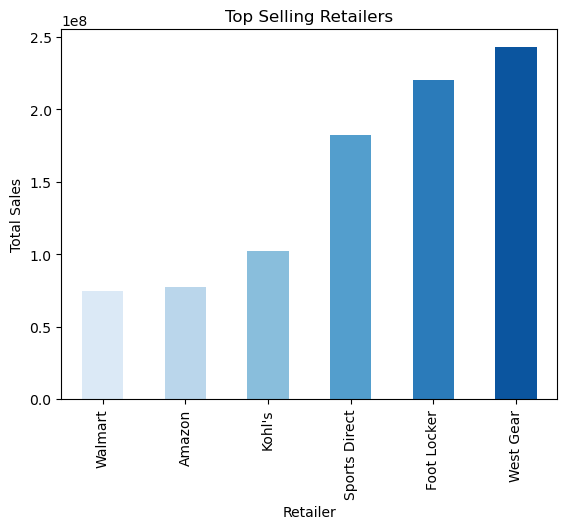

In [20]:
#Created top selling products bar chart
top_retailers_bar = retailer_sales['Total Sales'].sort_values(ascending=True).plot.bar(grid=False, color=sns.color_palette('Blues'))
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Top Selling Retailers')
plt.show()

In [21]:
#Saved bar chart
top_retailers_bar.figure.savefig(os.path.join(path, 'Visualizations','top_retailers_bar.png'), bbox_inches='tight')

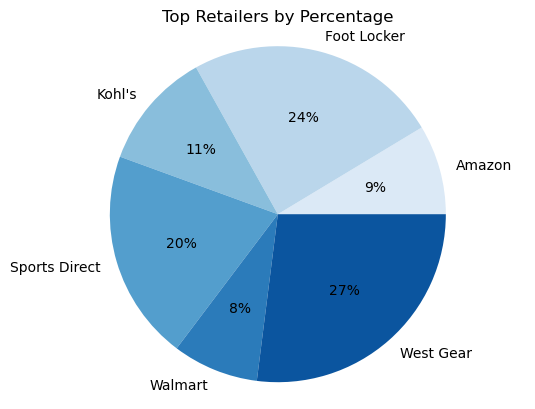

In [22]:
#Created pie chart
colors = sns.color_palette('Blues', 6) 
pie_chart, pie_labels, _ = plt.pie(retailer_sales['Total Sales'], labels=retailer_sales.index, colors=colors, autopct='%1.0f%%')
plt.title('Top Retailers by Percentage')
plt.axis('equal')
plt.show()

In [23]:
pie_chart[0].figure.savefig(os.path.join(path, 'Visualizations', 'top_retailers_by_perc.png'), bbox_inches='tight')

In [24]:
#Created dataframe top methods
methods_sales=pd.DataFrame((df["Sales Method"],df["Total Sales"]))
methods_sales= methods_sales.transpose()
methods_sales= methods_sales.groupby("Sales Method").sum()
methods_sales

,Total Sales
Sales Method,
In-store,356643750
Online,247672882
Outlet,295585493


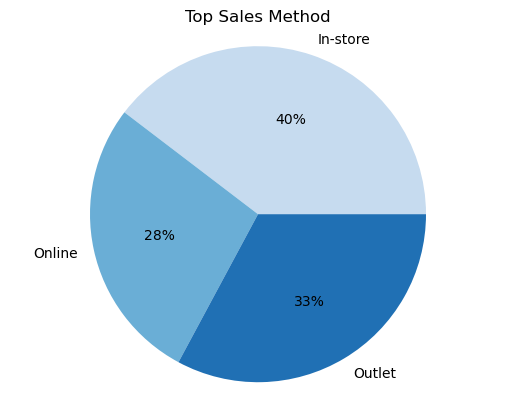

In [25]:
#Created pie chart
colors = sns.color_palette('Blues', 3) 
pie_chart, pie_labels, _ = plt.pie(methods_sales['Total Sales'], labels=methods_sales.index, colors=colors, autopct='%1.0f%%')
plt.title('Top Sales Method')
plt.axis('equal')
plt.show()

In [26]:
# Saved pie chart
pie_chart[0].figure.savefig(os.path.join(path, 'Visualizations', 'top_sales_method.png'), bbox_inches='tight')

In [27]:
#Created dataframe top 10 grossing cities
grossing_cities=pd.DataFrame((df["City"],df["Operating Profit"]))
grossing_cities= grossing_cities.transpose()
grossing_cities= grossing_cities.groupby("City").sum()
grossing_cities = grossing_cities.sort_values(by="Operating Profit", ascending=False).head(10)
grossing_cities

,Operating Profit
City,
Charleston,15607205
New York,13899981
Miami,12168628
Portland,10760813
San Francisco,10256252
Houston,9845140
Charlotte,9756425
Albany,9429864
New Orleans,9417239


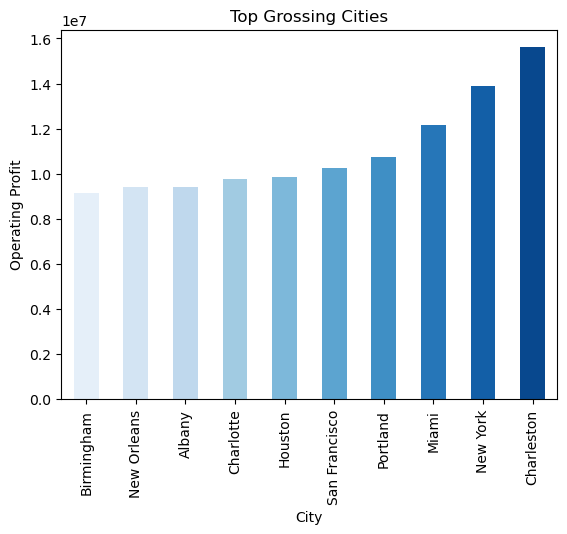

In [28]:
#Created top grossing cities bar chart
custom_palette = sns.color_palette("Blues", len(grossing_cities))
grossing_cities_bar = grossing_cities['Operating Profit'].sort_values(ascending=True).plot.bar(grid=False, color=custom_palette)
plt.xlabel('City')
plt.ylabel('Operating Profit')
plt.title('Top Grossing Cities')
plt.show()

In [29]:
#Saved bar chart
grossing_cities_bar.figure.savefig(os.path.join(path, 'Visualizations','grossing_cities_bar.png'), bbox_inches='tight')

In [30]:
#Created dataframe region sales
region_sales=pd.DataFrame((df["Region"],df["Total Sales"]))
region_sales= region_sales.transpose()
region_sales= region_sales.groupby("Region").sum()
region_sales

,Total Sales
Region,
Midwest,135800459
Northeast,186324067
South,144663181
Southeast,163171236
West,269943182


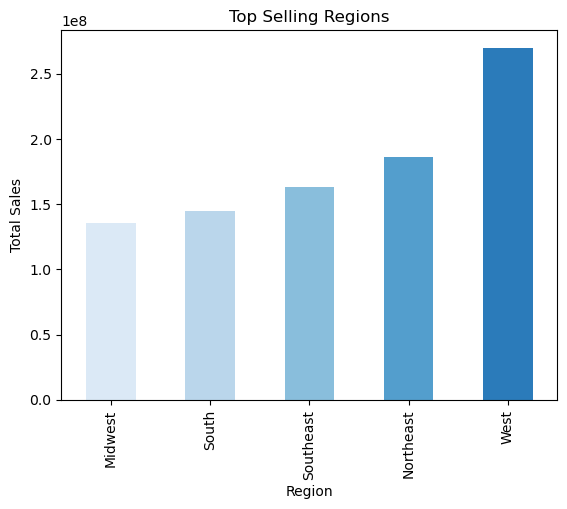

In [31]:
#Created regional sales bar chart
region_sales_bar = region_sales['Total Sales'].sort_values(ascending=True).plot.bar(grid=False, color=sns.color_palette('Blues'))
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Top Selling Regions')
plt.show()

In [32]:
#Saved bar chart
region_sales_bar.figure.savefig(os.path.join(path, 'Visualizations','region_sales_bar.png'), bbox_inches='tight')

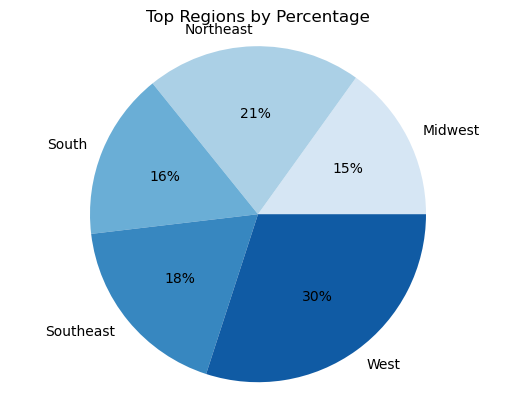

In [33]:
#Created pie chart
colors = sns.color_palette('Blues', 5) 
pie_chart, pie_labels, _ = plt.pie(region_sales['Total Sales'], labels=region_sales.index, colors=colors, autopct='%1.0f%%')
plt.title('Top Regions by Percentage')
plt.axis('equal')
plt.show()

In [34]:
# Saved pie chart
pie_chart[0].figure.savefig(os.path.join(path, 'Visualizations', 'top_regions_per.png'), bbox_inches='tight')

In [35]:
#Created pivot table for heatmap
pivot_df = df.pivot_table(index='Region', values='Operating Profit', aggfunc='sum')

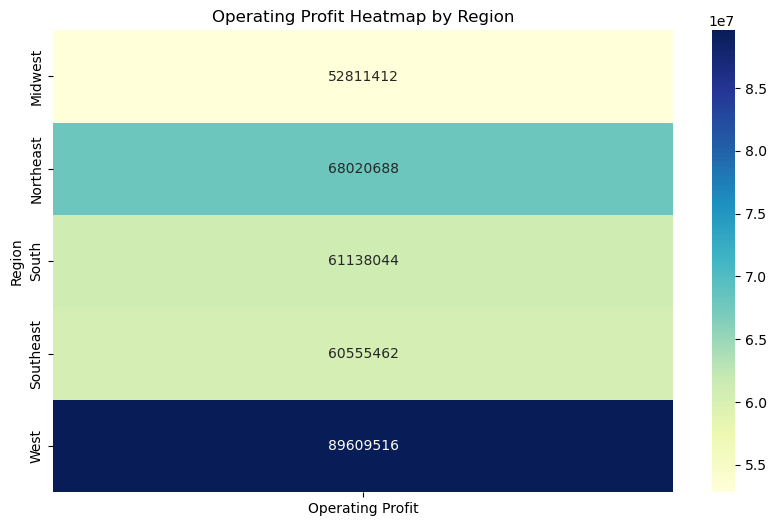

In [36]:
#Created heatmap for region and operating profit
heatmap = plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True)
plt.title('Operating Profit Heatmap by Region')
plt.ylabel('Region')
plt.show()

In [37]:
#Saved heatmap
heatmap.figure.savefig(os.path.join(path, 'Visualizations','heatmap.png'), bbox_inches='tight')

It can be seen by the heatmap that the West and Northeast regions are the most profitable regions for Adidas. Stakeholders can take this information and allocate resources in these profitable regions via marketing and expansion plans to further boost sales and profits.

In [38]:
#Grouped data
grouped_data = df.groupby(['Region', 'Retailer'])['Units Sold'].sum().unstack()

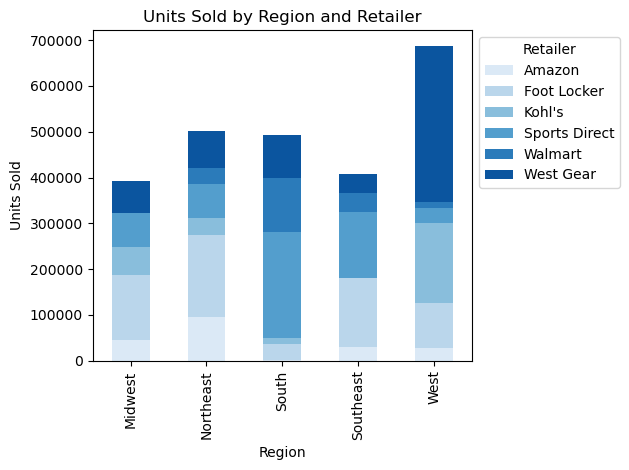

In [39]:
# Create the stacked bar chart
blue_palette = sns.color_palette("Blues")
sns.set_palette(blue_palette)
stackedbar1 = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.title('Units Sold by Region and Retailer')
plt.legend(title='Retailer', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [40]:
#Saved stacked bar
stackedbar1.figure.savefig(os.path.join(path, 'Visualizations','units_sold_region_retailer.png'), bbox_inches='tight')

This stacked bar chart shows that the West Region favors products from West Gear while the South region favors products from Sports Direct. It can also be noted that Foot Locker seems to remain a popular retailer across the different regions.

In [41]:
#Grouped data
grouped_data2 = df.groupby(['Region', 'Product'])['Units Sold'].sum().unstack()

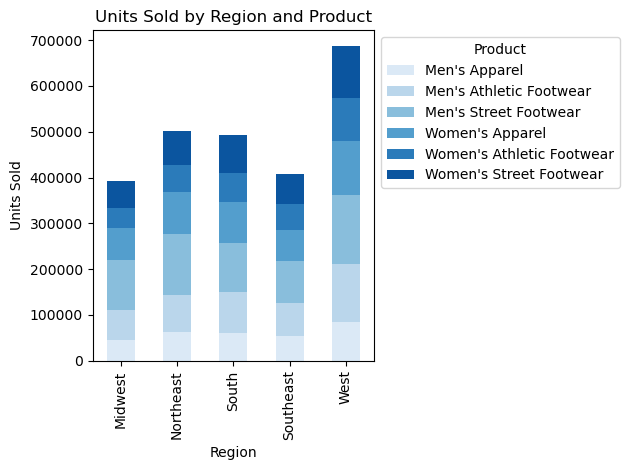

In [42]:
#Created the stacked bar chart
blue_palette = sns.color_palette("Blues")
sns.set_palette(blue_palette)
stackedbar2 = grouped_data2.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.title('Units Sold by Region and Product')
plt.legend(title='Product', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [43]:
#Saved stacked bar
stackedbar2.figure.savefig(os.path.join(path, 'Visualizations','units_sold_region_product.png'), bbox_inches='tight')

As displayed in the above-stacked bar chart Men's Street Footwear seems to be a popular product among all the different regions.

In [44]:
#Created sales by product method group
sales_by_product_method = df.groupby(['Product', 'Sales Method'])['Total Sales'].sum().reset_index()
sales_by_product_method.index+=1
sales_by_product_method

,Product,Sales Method,Total Sales
1,Men's Apparel,In-store,49325000
2,Men's Apparel,Online,35528995
3,Men's Apparel,Outlet,38874637
4,Men's Athletic Footwear,In-store,59348750
5,Men's Athletic Footwear,Online,41715609
6,Men's Athletic Footwear,Outlet,52609321
7,Men's Street Footwear,In-store,88852000
8,Men's Street Footwear,Online,56844308
9,Men's Street Footwear,Outlet,63129936
10,Women's Apparel,In-store,70248750


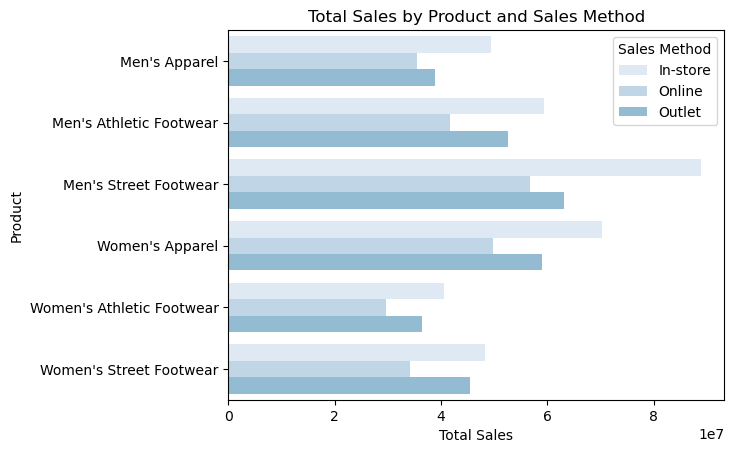

In [45]:
#Created bar chart
totsales_prod_method = sns.barplot(data=sales_by_product_method,y='Product',x='Total Sales',hue='Sales Method')
plt.title('Total Sales by Product and Sales Method')
plt.show()

In [46]:
#Saved bar chart
totsales_prod_method.figure.savefig(os.path.join(path, 'Visualizations','totsales_prod_method.png'), bbox_inches='tight')

The bar chart displays In-Store purchases as the most popular among all the products, with Outlet purchases ranked second and Online purchases being last.

In [47]:
#Created sales by product method group
retailer_totsales = df.groupby(['Retailer', 'Sales Method'])['Total Sales'].sum().reset_index()
retailer_totsales.index+=1
retailer_totsales

,Retailer,Sales Method,Total Sales
1,Amazon,In-store,22366250
2,Amazon,Online,28909731
3,Amazon,Outlet,26422931
4,Foot Locker,In-store,76525000
5,Foot Locker,Online,72943290
6,Foot Locker,Outlet,70626430
7,Kohl's,In-store,29566250
8,Kohl's,Online,30992229
9,Kohl's,Outlet,41556274
10,Sports Direct,In-store,55048500


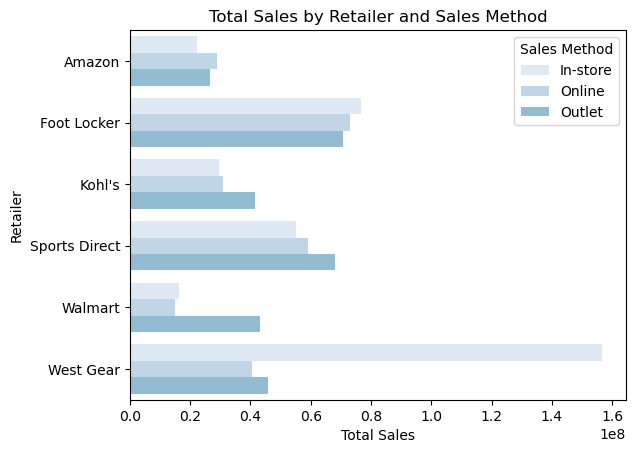

In [48]:
#Created bar chart
retailer_totsales = sns.barplot(data=retailer_totsales,y='Retailer',x='Total Sales',hue='Sales Method')
plt.title('Total Sales by Retailer and Sales Method')
plt.show()

In [49]:
#Saved bar chart
retailer_totsales.figure.savefig(os.path.join(path, 'Visualizations','retailer_totsales.png'), bbox_inches='tight')

Based on the bar chart above each Retailer varies extremely by which sales method was the most popular among each of the different groups. West Gear had most of its sales In-Store, while Sports Direct had most of its sales by Outlet.

In [50]:
#Grouped data
grouped_data3 = df.groupby(['Invoice Month', 'Region'])['Total Sales'].sum().unstack().fillna(0)

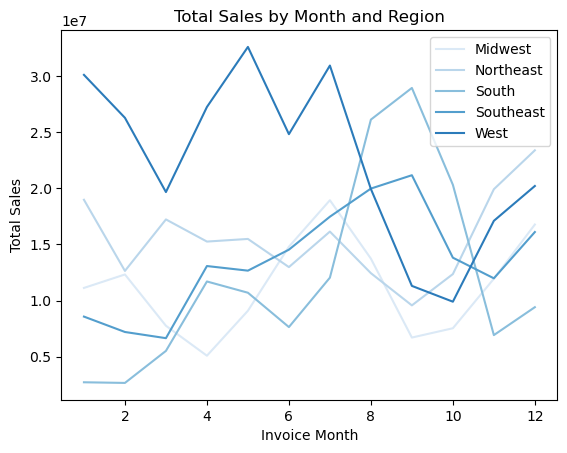

In [51]:
#Created line chart
for region in grouped_data3.columns:
    plt.plot(grouped_data3.index, grouped_data3[region], label=region)
plt.xlabel("Invoice Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month and Region")
plt.legend()
plt.show()

In [52]:
# Saved line chart
plt.savefig("total_sales_by_month_and_region.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Based on the line chart one can see that we have an increase in total sales in the summer months, along with an increase during the holiday season around December. 

In [53]:
#Grouped data
grouped_data4 = df.groupby(['Retailer', 'Sales Method'])['Total Sales'].sum().unstack().fillna(0)

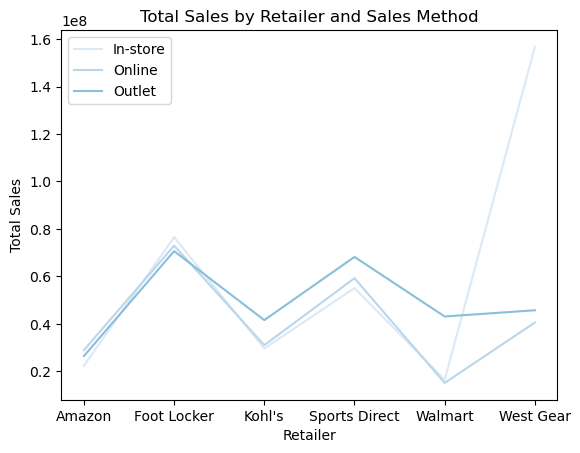

In [54]:
#Created line chart
for sales_method in grouped_data4.columns:
    plt.plot(grouped_data4.index, grouped_data4[sales_method], label=sales_method)
plt.xlabel("Retailer")
plt.ylabel("Total Sales")
plt.title("Total Sales by Retailer and Sales Method")
plt.legend()
plt.show()

In [55]:
#Saved line chart
plt.savefig("total_sales_by_retailer_and_method.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Based on the line chart it can be seen that a significant peak of total sales for In-Store purchases occurred for West Gear. Foot Locker and Sports Direct’s total sales seem to peak equally with all the different types of sales methods.

In [56]:
#Grouped data
grouped_data5 = df.groupby(['Retailer', 'Invoice Year'])['Operating Margin'].sum().unstack().fillna(0)

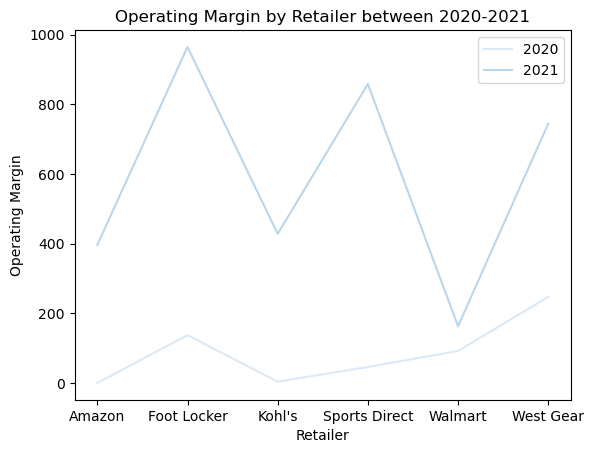

In [57]:
#Created line chart
for invoice_year in grouped_data5.columns:
    plt.plot(grouped_data5.index, grouped_data5[invoice_year], label=invoice_year)
plt.xlabel("Retailer")
plt.ylabel("Operating Margin")
plt.title("Operating Margin by Retailer between 2020-2021")
plt.legend()
plt.show()

In [58]:
#Saved line chart
plt.savefig("opmarg_retailer_year.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [59]:
#Grouped data
grouped_data6 = df.groupby(['Retailer', 'Sales Method'])['Operating Margin'].sum().unstack().fillna(0)

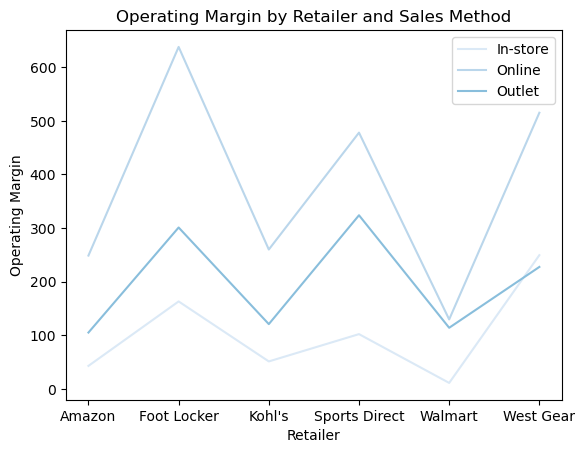

In [60]:
 #Created line chart
for sales_method in grouped_data6.columns:
    plt.plot(grouped_data6.index, grouped_data6[sales_method], label=sales_method)
plt.xlabel("Retailer")
plt.ylabel("Operating Margin")
plt.title("Operating Margin by Retailer and Sales Method")
plt.legend()
plt.show()

In [61]:
#Saved line chart
plt.savefig("opmarg_retailer_method.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Based on the above line chart one can see that the year 2021 had a higher operating margin than the year 2020. With the retailer Foot Locker peaking in both years. Following with Sports Direct and West Gear operating margins peaking in 2021.

Operating Margin shows:
Online > Outlet > In-Store 

It can be seen by the second line chart that Walmart had a poor operating margin performance across all types of sales methods, along with Kohl's. Meanwhile, Foot Locker, Sports Direct, and West Gear had a high operating margin performance.

In [62]:
#Grouped data
grouped_data7 = df.groupby(['Retailer', 'Product'])['Total Sales'].sum().reset_index()

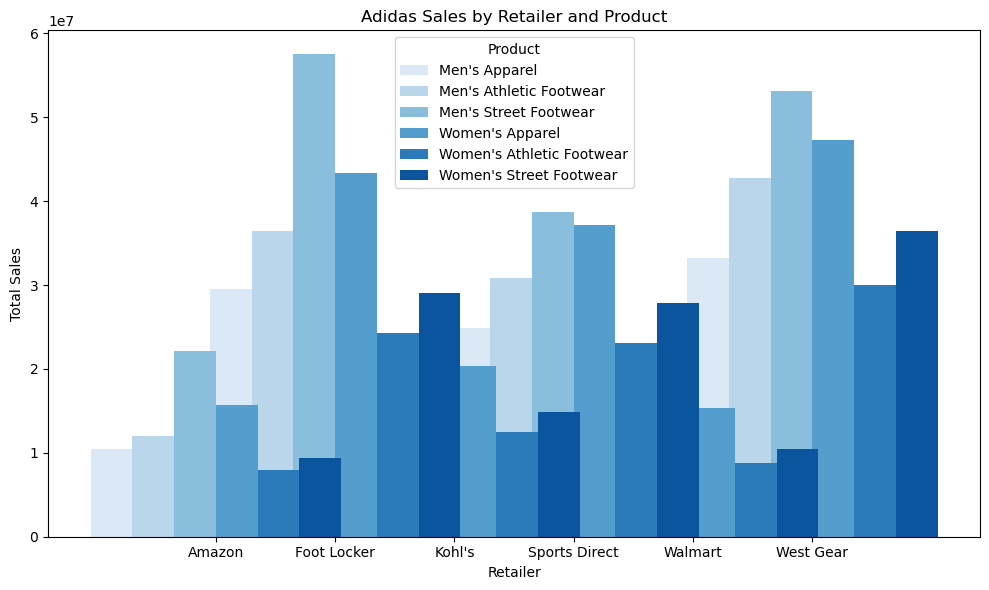

In [63]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
# Get unique retailers and products
retailers = grouped_data7['Retailer'].unique()
products = grouped_data7['Product'].unique()
# Set the bar positions
x = range(len(retailers))
# Create bars for each product within each retailer
for i, product in enumerate(products):
    sales = grouped_data7[grouped_data7['Product'] == product]['Total Sales']
    plt.bar([pos + i * bar_width for pos in x], sales, width=bar_width, label=product)
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Adidas Sales by Retailer and Product')
plt.xticks([pos + bar_width * (len(products) - 1) / 2 for pos in x], retailers)
plt.legend(title='Product')
plt.tight_layout()
plt.show()

# Open 4.9 pt 2 and 4.10 task and on tab 7 of kaggle analysis ideas and on 4th to last tab on kaggle